In [152]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
%matplotlib inline

In [156]:
from utils import *

# Expérimentations et analyses

On cherche à comparer l'impact de la mesure de discrimination sur le classifieur en terme de taux de bonne classification et de monotonie, en testant les mesures sous les mêmes conditions expérimentales.

Pour cela, on étudie l'impact du bruit non monotone sur les performances des différentes mesures. 

In [62]:
g = Log()
h = Sum()

# rank Shannon discrimination measure
f_r = Dsr()
rsdm = Gdm(h, g, f_r)

# conditional Shannon entropy
f = Ds()
sdm = Gdm(h, g, f)

# pessimistic rank discrimination measure
f_p = Mindsr()
g_p = Frac() 
prdm = Gdm(h, g_p, f_p)

## Expérimentations sur des bases artificielles

Dans un premier temps, on étudie l'effet du bruit non-monotone sur nos mesures en générant des datasets artificiels avec un degré de bruit non monotone croissant.

### Datasets à deux dimensions dont une seule est monotone

### - 2 classes :

- 10 exemples : 

-> pas de bruit :

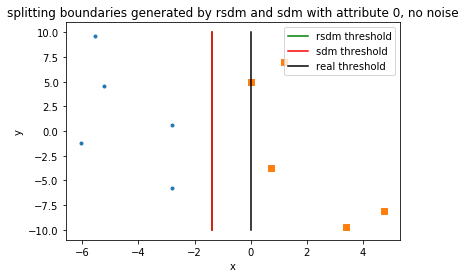

In [131]:
set2_10_0, t = generate_2Ddataset(0, 2, 10, 0., 0.1, [[-10, 10], [-10, 10]])
t1, h1 = discretize(rsdm, set2_10_0, 0)
t2, h2 = discretize(sdm, set2_10_0, 0)
display_discretizations_comparison(set2_10_0, t1, t2, [0], 0, "splitting boundaries generated by rsdm and sdm with attribute 0, no noise", "rsdm threshold", "sdm threshold")

In [83]:
train_set2_10_0, test_set2_10_0 = split_dataset(set2_10_0, 80)

depth :  2
number of leaves :  2
rule monotone :  True
accuracy :  1.0
(1, array([-9.30241541, -9.36073731]), array([-1.63853399,  5.7954443 ]))
(2, array([ 0.56172118, -8.79055862]), array([8.5768724 , 9.40580694]))
0.5


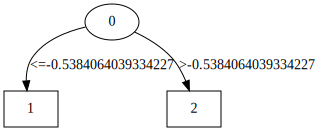

In [84]:
rdmt2_10 = RDMT(rsdm, "shannon", 0, 10, 0, [1, 2])
rdmt2_10.train(train_set2_10_0)
print("depth : ", rdmt2_10.get_depth())
print("number of leaves : ", rdmt2_10.get_nb_leaves())
print("rule monotone : ", rdmt2_10.is_rule_monotone())
print("accuracy : ", rdmt2_10.accuracy(test_set2_10_0))
print(I_tree(rdmt2_10))
rdmt2_10.plot()

depth :  2
number of leaves :  2
rule monotone :  True
accuracy :  1.0
0.5


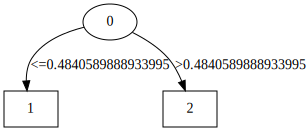

In [78]:
dmt2_10 = RDMT(sdm, "shannon", 0, 10, 0, [1, 2])
dmt2_10.train(train_set2_10_0)
print("depth : ", dmt2_10.get_depth())
print("number of leaves : ", dmt2_10.get_nb_leaves())
print("rule monotone : ", dmt2_10.is_rule_monotone())
print("accuracy : ", dmt2_10.accuracy(test_set2_10_0))
print(I_tree(dmt2_10))
dmt2_10.plot()

-> 30% de bruit :

In [32]:
set2_10_30, t = generate_2Ddataset(0, 2, 10, 0.3, 0.1, [[-10, 10], [-10, 10]])
t1, h1 = discretize(rsdm, set2_10_30, 0)
t2, h2 = discretize(sdm, set2_10_30, 0)
display_discretizations_comparison(set2_10_30, t1, t2, [0], 0, "splitting boundaries generated by rsdm and sdm with attribute 0, 30% of noise", "rsdm threshold", "sdm threshold")

In [33]:
train_set2_10_30, test_set2_10_30 = split_dataset(set2_10_30, 80)

depth :  2
number of leaves :  2
rule monotone :  True
accuracy :  0.5
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  0.0


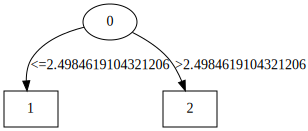

In [34]:
rdmt2_10 = RDMT(rsdm, "shannon", 0, 10, 0, [1, 2])
rdmt2_10.train(train_set2_10_30)
print("depth : ", rdmt2_10.get_depth())
print("number of leaves : ", rdmt2_10.get_nb_leaves())
print("rule monotone : ", rdmt2_10.is_rule_monotone())
print("accuracy : ", rdmt2_10.accuracy(test_set2_10_30))
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", rdmt2_10.get_ratio_non_monotone_pairs())

rdmt2_10.plot()

depth :  2
number of leaves :  2
rule monotone :  True
accuracy :  0.5
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  0.0


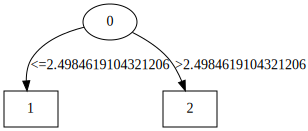

In [35]:
dmt2_10 = RDMT(sdm, "shannon", 0, 10, 0, [1, 2])
dmt2_10.train(train_set2_10_30)
print("depth : ", dmt2_10.get_depth())
print("number of leaves : ", dmt2_10.get_nb_leaves())
print("rule monotone : ", dmt2_10.is_rule_monotone())
print("accuracy : ", dmt2_10.accuracy(test_set2_10_30))
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", dmt2_10.get_ratio_non_monotone_pairs())

dmt2_10.plot()

-> 70% de bruit :

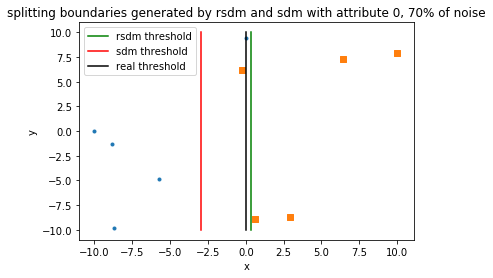

In [85]:
set2_10_70, t = generate_2Ddataset(0, 2, 10, 0.7, 0.1, [[-10, 10], [-10, 10]])
t1, h1 = discretize(rsdm, set2_10_70, 0)
t2, h2 = discretize(sdm, set2_10_70, 0)
display_discretizations_comparison(set2_10_70, t1, t2, [0], 0, "splitting boundaries generated by rsdm and sdm with attribute 0, 70% of noise", "rsdm threshold", "sdm threshold")

In [86]:
train_set2_10_70, test_set2_10_70 = split_dataset(set2_10_70, 80)

depth :  4
number of leaves :  4
rule monotone :  False
accuracy :  1.0
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  1.0


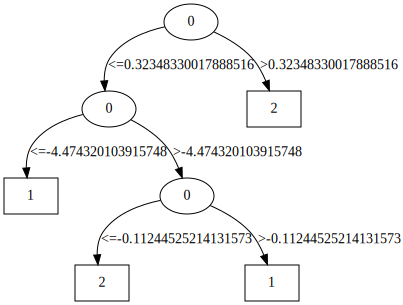

In [87]:
rdmt2_10 = RDMT(rsdm, "shannon", 0, 10, 0, [1, 2])
rdmt2_10.train(train_set2_10_70)
print("depth : ", rdmt2_10.get_depth())
print("number of leaves : ", rdmt2_10.get_nb_leaves())
print("rule monotone : ", rdmt2_10.is_rule_monotone())
print("accuracy : ", rdmt2_10.accuracy(test_set2_10_70))
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", rdmt2_10.get_ratio_non_monotone_pairs())

rdmt2_10.plot()

depth :  3
number of leaves :  3
rule monotone :  False
accuracy :  1.0
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  1.0


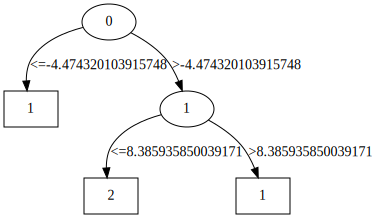

In [88]:
dmt2_10 = RDMT(sdm, "shannon", 0, 10, 0, [1, 2])
dmt2_10.train(train_set2_10_70)
print("depth : ", dmt2_10.get_depth())
print("number of leaves : ", dmt2_10.get_nb_leaves())
print("rule monotone : ", dmt2_10.is_rule_monotone())
print("accuracy : ", dmt2_10.accuracy(test_set2_10_70))
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", dmt2_10.get_ratio_non_monotone_pairs())

dmt2_10.plot()

- 100 exemples :  

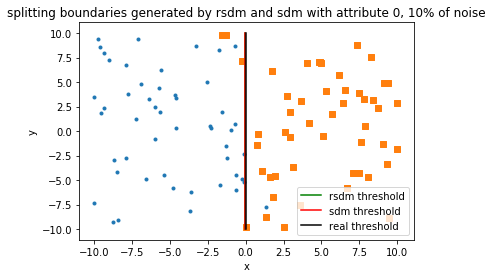

In [114]:
set2_100, t = generate_2Ddataset(0, 2, 100, 0.1, 0.1, [[-10, 10], [-10, 10]])
t1, h1 = discretize(rsdm, set2_100, 0)
t2, h2 = discretize(sdm, set2_100, 0)
display_discretizations_comparison(set2_100, t1, t2, [0], 0, "splitting boundaries generated by rsdm and sdm with attribute 0, 10% of noise", "rsdm threshold", "sdm threshold")

In [115]:
train_set2_100, test_set2_100 = split_dataset(set2_100, 80)

In [116]:
sets2_100 = get_ten_folds(set2_100)

depth :  5
number of leaves :  8
rule monotone :  False
accuracy :  1.0
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  0.95


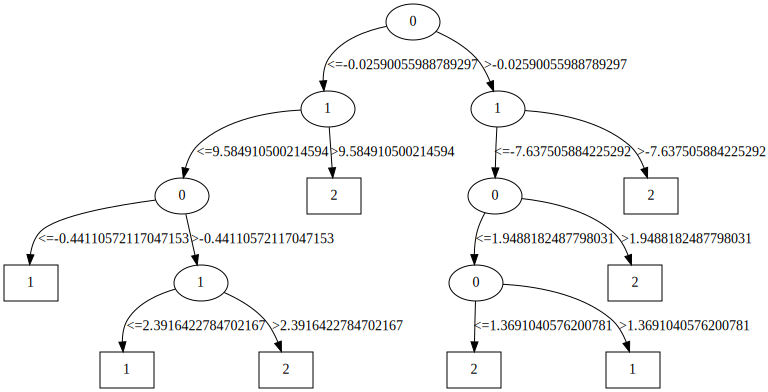

In [117]:
rdmt2_100 = RDMT(rsdm, "shannon", 0, 100, 0.01, [1, 2])
rdmt2_100.train(train_set2_100)
print("depth : ", rdmt2_100.get_depth())
print("number of leaves : ", rdmt2_100.get_nb_leaves())
print("rule monotone : ", rdmt2_100.is_rule_monotone())
print("accuracy : ", rdmt2_100.accuracy(test_set2_100))
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", rdmt2_100.get_ratio_non_monotone_pairs())
rdmt2_100.plot()


depth :  5
number of leaves :  7
rule monotone :  False
accuracy :  1.0
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  1.0


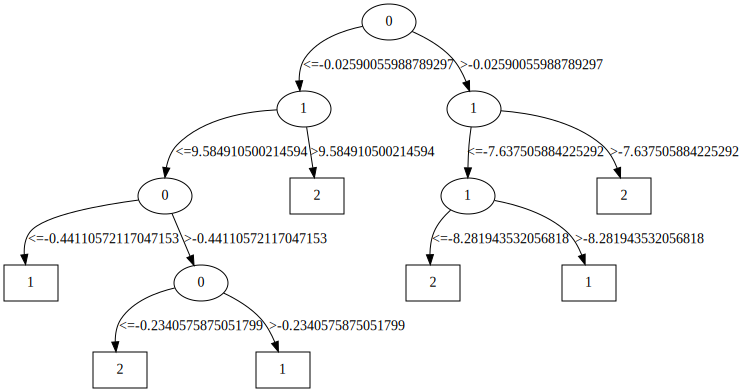

In [118]:
dmt2_100 = RDMT(sdm, "shannon", 0, 100, 0.01, [1, 2])
dmt2_100.train(train_set2_100)
print("depth : ", dmt2_100.get_depth())
print("number of leaves : ", dmt2_100.get_nb_leaves())
print("rule monotone : ", dmt2_100.is_rule_monotone())
print("accuracy : ", dmt2_100.accuracy(test_set2_100))
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", dmt2_100.get_ratio_non_monotone_pairs())

dmt2_100.plot()

In [119]:
avg_accuracy = 0
avg_leaves = 0
avg_depth = 0
avg_ratio = 0
avg_pairs = 0

for i in range(10):
    test_set = sets2_100[i]
    train_set = LabeledSet(2)
    for j in range(0, 10):
        if i != j:
            train_set.addExamples(sets2_100[j].x, sets2_100[j].y)
    tree = RDMT(rsdm, "shannon", 0, 100, 0.01, [1, 2])
    tree.train(train_set)
    avg_accuracy += tree.accuracy(test_set)
    avg_leaves += tree.get_nb_leaves()
    avg_depth += tree.get_depth()
    avg_ratio += tree.get_ratio_non_monotone_pairs() 
    avg_pairs += tree.get_total_pairs()
        
avg_accuracy = avg_accuracy * (1.0/10)
avg_leaves = avg_leaves * (1.0/10)
avg_depth = avg_depth * (1.0/10)
avg_ratio = avg_ratio * (1.0/10)
avg_pairs = avg_pairs * (1.0/10)

print("average accuracy : ", avg_accuracy)
print("average depth : ", avg_depth)
print("average number of leaves : ", avg_leaves)
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", avg_ratio)
print("average number of pairs used for ratio computing : ", avg_pairs)

average accuracy :  0.91
average depth :  5.300000000000001
average number of leaves :  7.7
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  0.9155555555555557
average number of pairs used for ratio computing :  1.9000000000000001


In [120]:
avg_accuracy = 0
avg_leaves = 0
avg_depth = 0
avg_ratio = 0
avg_pairs = 0

for i in range(10):
    test_set = sets2_100[i]
    train_set = LabeledSet(2)
    for j in range(0, 10):
        if i != j:
            train_set.addExamples(sets2_100[j].x, sets2_100[j].y)
    tree = RDMT(sdm, "shannon", 0, 100, 0.01, [1, 2])
    tree.train(train_set)
    avg_accuracy += tree.accuracy(test_set)
    avg_leaves += tree.get_nb_leaves()
    avg_depth += tree.get_depth()
    avg_ratio += tree.get_ratio_non_monotone_pairs() 
    avg_pairs += tree.get_total_pairs()
        
avg_accuracy = avg_accuracy * (1.0/10)
avg_leaves = avg_leaves * (1.0/10)
avg_depth = avg_depth * (1.0/10)
avg_ratio = avg_ratio * (1.0/10)
avg_pairs = avg_pairs * (1.0/10)

print("average accuracy : ", avg_accuracy)
print("average depth : ", avg_depth)
print("average number of leaves : ", avg_leaves)
print("average ratio between number of pairwise non-monotone label comparisons and number of pairs : ", avg_ratio)
print("average number of pairs used for ratio computing : ", avg_pairs)

average accuracy :  0.9200000000000002
average depth :  5.0
average number of leaves :  6.7
average ratio between number of pairwise non-monotone label comparisons and number of pairs :  0.9477777777777778
average number of pairs used for ratio computing :  1.9000000000000001


In [173]:
y1 = []
y2 = []
y3 = []

avg_leaves1 = []
avg_leaves2 = []
avg_leaves3 = []

avg_depth1 = []
avg_depth2 = []
avg_depth3 = []

avg_ratio1 = []
avg_ratio2 = []
avg_ratio3 = []

avg_pairs1 = []
avg_pairs2 = []
avg_pairs3 = []

#noises = np.arange(0., 1., 0.01)
#noises = np.arange(0., 0.5, 0.1)

start = time.time()

#dataset, t = generate_2Ddataset(0, 2, 1000, 0, 0.1, [[-10, 10], [-10, 10]])
dataset, t = generate_2Ddataset(0, 2, 100, 0, 0.1, [[-10, 10], [-10, 10]])

noises = []
noise = 0

for k in range(2):
    #dataset = add_noise(dataset, 0.05)
    if k > 0:
        dataset = add_noise(dataset, 0.1)
    sets = get_ten_folds(dataset)
    noises.append(noise)
    noise += 0.05
    
    acc1 = 0
    leaves1 = 0
    depth1 = 0
    ratio1 = 0
    pairs1 = 0
    
    acc2 = 0
    leaves2 = 0
    depth2 = 0
    ratio2 = 0
    pairs2 = 0
    
    acc3 = 0
    leaves3 = 0
    depth3 = 0
    ratio3 = 0
    pairs3 = 0
    
    
    for i in range(10):
        test_set = sets[i]
        train_set = LabeledSet(2)
        for j in range(0, 10):
            if i != j:
                train_set.addExamples(sets[j].x, sets[j].y)
        tree1 = RDMT(rsdm, "shannon", 0, 100, 0.01, [1, 2])
        tree1.train(train_set)
        acc1 += tree1.accuracy(test_set)
        leaves1 += tree1.get_nb_leaves()
        depth1 += tree1.get_depth()
        ratio1 += tree1.get_ratio_non_monotone_pairs() 
        pairs1 += tree1.get_total_pairs()
        
        tree2 = RDMT(sdm, "shannon", 0, 100, 0.01, [1, 2])
        tree2.train(train_set)
        acc2 += tree2.accuracy(test_set)
        leaves2 += tree2.get_nb_leaves()
        depth2 += tree2.get_depth()
        ratio2 += tree2.get_ratio_non_monotone_pairs() 
        pairs2 += tree2.get_total_pairs()
        
        tree3 = RDMT(prdm, "shannon", 0, 100, 0.01, [1, 2])
        tree3.train(train_set)
        acc3 += tree3.accuracy(test_set)
        leaves3 += tree3.get_nb_leaves()
        depth3 += tree3.get_depth()
        ratio3 += tree3.get_ratio_non_monotone_pairs() 
        pairs3 += tree3.get_total_pairs()
        
    y1.append(acc1 * (1.0/10))    
    avg_leaves1.append(leaves1 * (1.0/10))
    avg_depth1.append(depth1 * (1.0/10))
    avg_ratio1.append(ratio1 * (1.0/10))
    avg_pairs1.append(pairs1 * (1.0/10))
    
    y2.append(acc2 * (1.0/10))    
    avg_leaves2.append(leaves2 * (1.0/10))
    avg_depth2.append(depth2 * (1.0/10))
    avg_ratio2.append(ratio2 * (1.0/10))
    avg_pairs2.append(pairs2 * (1.0/10))
    
    y3.append(acc3 * (1.0/10))    
    avg_leaves3.append(leaves3 * (1.0/10))
    avg_depth3.append(depth3 * (1.0/10))
    avg_ratio3.append(ratio3 * (1.0/10))
    avg_pairs3.append(pairs3 * (1.0/10))    
    
print("Running time : ", format(time.time() - start))

Running time :  443.24786472320557


In [174]:
x = np.array(noises) * 100
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)

In [175]:
x

array([0., 5.])

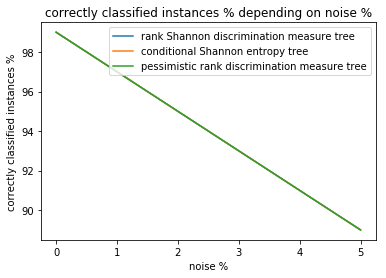

In [176]:
plt.plot(x, y1 * 100, label="rank Shannon discrimination measure tree")
plt.plot(x, y2 * 100, label="conditional Shannon entropy tree")
plt.plot(x, y3 * 100, label="pessimistic rank discrimination measure tree")
plt.xlabel("noise %")
plt.ylabel("correctly classified instances %")
plt.title("correctly classified instances % depending on noise %")
plt.legend()
plt.show()

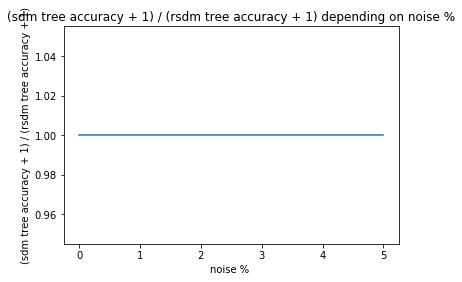

In [177]:
z = ((y2 + 1) / (y1 + 1))
plt.plot(x, z)
plt.xlabel("noise % ")
plt.ylabel("(sdm tree accuracy + 1) / (rsdm tree accuracy + 1)")
plt.title("(sdm tree accuracy + 1) / (rsdm tree accuracy + 1) depending on noise %")
plt.show()

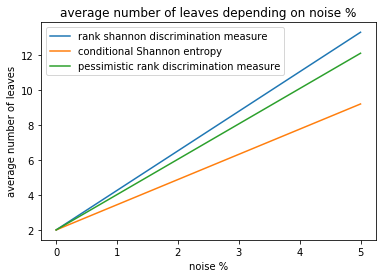

In [178]:
plt.plot(x, avg_leaves1, label="rank shannon discrimination measure")
plt.plot(x, avg_leaves2, label="conditional Shannon entropy")
plt.plot(x, avg_leaves3, label="pessimistic rank discrimination measure")
plt.xlabel("noise %")
plt.ylabel("average number of leaves")
plt.title("average number of leaves depending on noise %")
plt.legend()
plt.show()

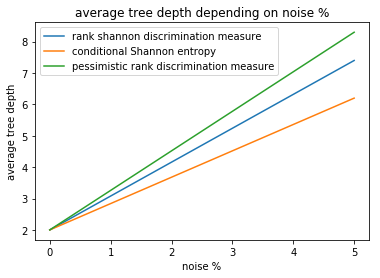

In [179]:
plt.plot(x, avg_depth1, label="rank shannon discrimination measure")
plt.plot(x, avg_depth2, label="conditional Shannon entropy")
plt.plot(x, avg_depth3, label="pessimistic rank discrimination measure")
plt.xlabel("noise %")
plt.ylabel("average tree depth")
plt.title("average tree depth depending on noise %")
plt.legend()
plt.show()

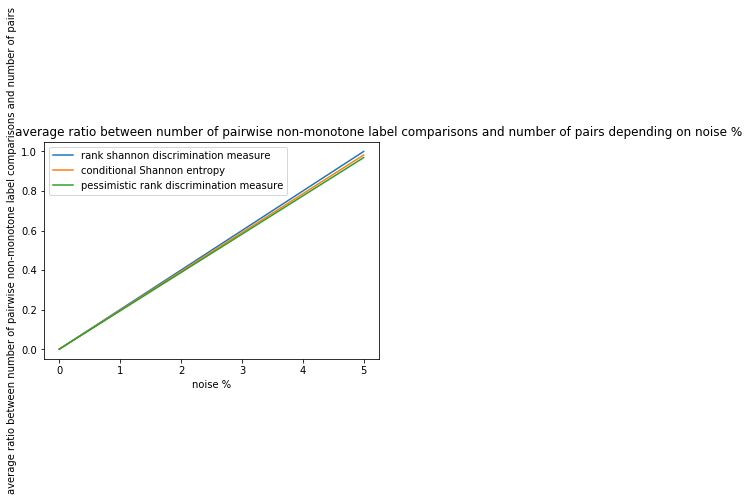

In [180]:
plt.plot(x, avg_ratio1, label="rank shannon discrimination measure")
plt.plot(x, avg_ratio2, label="conditional Shannon entropy")
plt.plot(x, avg_ratio3, label="pessimistic rank discrimination measure")
plt.xlabel("noise %")
plt.ylabel("average ratio between number of pairwise non-monotone label comparisons and number of pairs")
plt.title("average ratio between number of pairwise non-monotone label comparisons and number of pairs depending on noise %", x=1)
plt.legend()
plt.show()

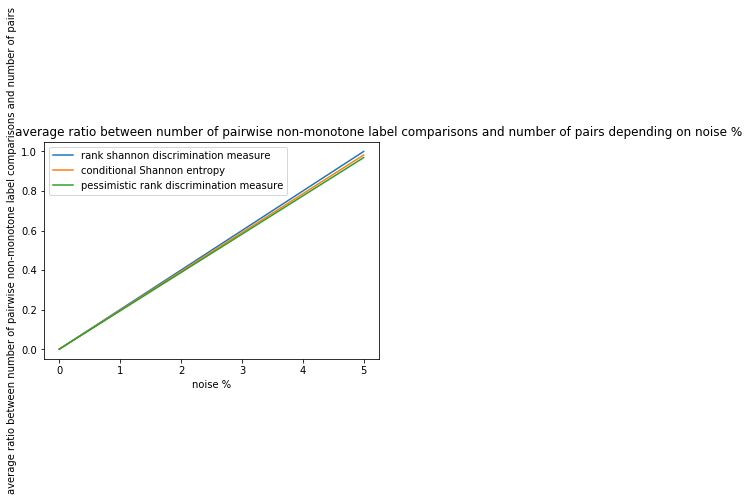

In [181]:
plt.plot(x[0:30], avg_ratio1[0:30], label="rank shannon discrimination measure")
plt.plot(x[0:30], avg_ratio2[0:30], label="conditional Shannon entropy")
plt.plot(x[0:30], avg_ratio3[0:30], label="pessimistic rank discrimination measure")
plt.xlabel("noise %")
plt.ylabel("average ratio between number of pairwise non-monotone label comparisons and number of pairs")
plt.title("average ratio between number of pairwise non-monotone label comparisons and number of pairs depending on noise %", x=1)
plt.legend()
plt.show()

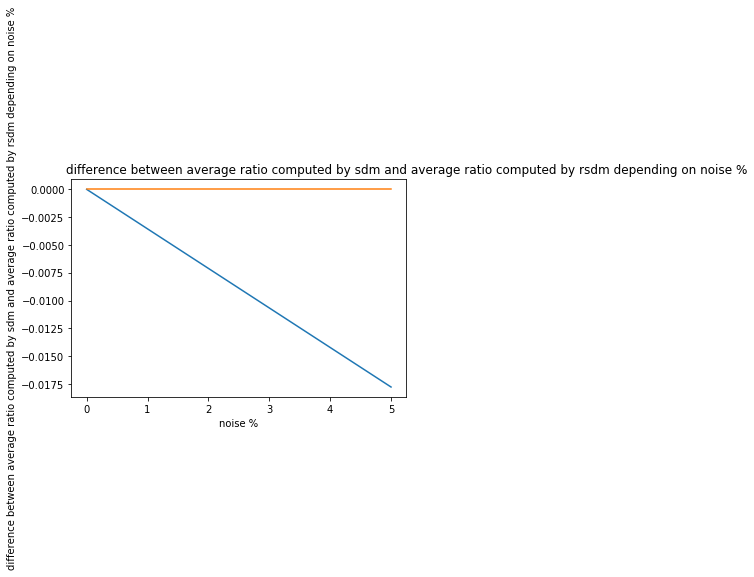

In [182]:
plt.plot(x, np.array(avg_ratio2) - np.array(avg_ratio1))
plt.plot(x, np.array([0] * len(x)))
plt.xlabel("noise %")
plt.ylabel("difference between average ratio computed by sdm and average ratio computed by rsdm depending on noise %")
plt.title("difference between average ratio computed by sdm and average ratio computed by rsdm depending on noise %", x=1)
plt.show()

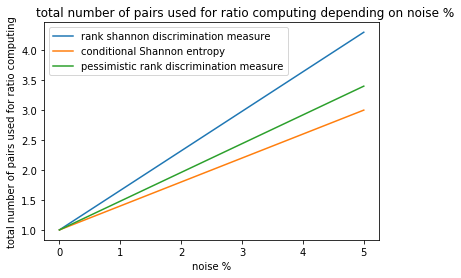

In [183]:
plt.plot(x, avg_pairs1, label="rank shannon discrimination measure")
plt.plot(x, avg_pairs2, label="conditional Shannon entropy")
plt.plot(x, avg_pairs3, label="pessimistic rank discrimination measure")
plt.xlabel("noise %")
plt.ylabel("total number of pairs used for ratio computing")
plt.title("total number of pairs used for ratio computing depending on noise %", x=0.6)
plt.legend()
plt.show()

## Expérimentations sur des datasets monotone consistent

### 2 classes :

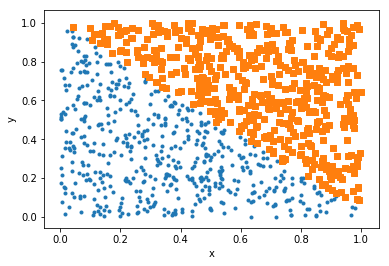

In [100]:
set2_10_0 = generate_monotone_dataset(1000, 2)

plot2DSet(set2_10_0, "")

In [ ]:
y1 = []
y2 = []

avg_leaves1 = []
avg_leaves2 = []

avg_depth1 = []
avg_depth2 = []

noises = np.arange(0., 1., 0.01)

for noise in noises:
    dataset, t = generate_2Ddataset(0, 2, 1000, noise, 0.1, [[-10, 10], [-10, 10]])
    sets = get_ten_folds(dataset)
    
    avg_accuracy = 0
    avg_leaves = 0
    avg_depth = 0
    
    for i in range(5):
        test_set = sets[i]
        train_set = LabeledSet(2)
        for j in range(0, 5):
            if i != j:
                train_set.addExamples(sets[j].x, sets[j].y)
        tree = RDMT(rsdm, "shannon", 0, 10, 0, [1, 2])
        tree.train(train_set)
        avg_accuracy += tree.accuracy(test_set)
        avg_leaves += tree.get_nb_leaves()
        avg_depth += tree.get_depth()
            
    avg_accuracy = avg_accuracy * (1.0/5)
    avg_leaves = avg_leaves * (1.0/5)
    avg_depth = avg_depth * (1.0/5)
    y1.append(avg_accuracy)
    avg_leaves1.append(avg_leaves)
    avg_depth1.append(avg_depth)
    
    avg_accuracy = 0
    avg_leaves = 0
    avg_depth = 0
    
    for i in range(5):
        test_set = sets[i]
        train_set = LabeledSet(2)
        for j in range(0, 5):
            if i != j:
                train_set.addExamples(sets[j].x, sets[j].y)
        tree = RDMT(sdm, "shannon", 0, 10, 0, [1, 2])
        tree.train(train_set)
        avg_accuracy += tree.accuracy(test_set)
        avg_leaves += tree.get_nb_leaves()
        avg_depth += tree.get_depth()
    
    avg_accuracy = avg_accuracy * (1.0/5)
    avg_leaves = avg_leaves * (1.0/5)
    avg_depth = avg_depth * (1.0/5)
    y2.append(avg_accuracy)
    avg_leaves2.append(avg_leaves)
    avg_depth2.append(avg_depth)